In [231]:
#logistic regression implementation


In [233]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
## Display plot over here
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification

In [237]:
X,y =make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [239]:
X

array([[-0.3779567 ,  1.04389498,  1.04349443, ..., -0.0671922 ,
         0.17547148, -1.04964564],
       [-0.32525851,  1.27626282, -0.68612327, ...,  1.00663329,
        -0.83369182,  0.95774417],
       [ 0.73901891, -0.60090284, -0.17729436, ..., -0.21898072,
         0.87864296, -1.25774001],
       ...,
       [ 0.67556288, -0.53841971, -1.29950008, ...,  2.04333597,
         0.94738793,  0.79035376],
       [ 2.62971021, -2.45289885, -1.35978523, ...,  0.37889809,
        -1.97189411, -0.2522504 ],
       [-1.79149103, -0.12190773,  0.53515332, ..., -1.94135733,
         0.58900166, -1.00748218]])

In [241]:
pd.DataFrame(X)


,0,1,2,3,4,5,6,7,8,9
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107
...,...,...,...,...,...,...,...,...,...,...
995,1.538272,0.171629,0.075371,-0.957658,-1.066219,1.158096,-0.036964,0.123689,0.927871,-0.225003
996,-0.060266,0.095018,-0.271685,1.830560,0.219445,-0.341269,1.180088,-0.216876,-1.752938,-0.810152
997,0.675563,-0.538420,-1.299500,0.747835,1.733898,-0.268044,-0.520953,2.043336,0.947388,0.790354
998,2.629710,-2.452899,-1.359785,1.592065,0.854157,1.618828,0.621701,0.378898,-1.971894,-0.252250


In [243]:
y


array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.30,random_state=42)

In [249]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [251]:
logistic.fit(X_train,y_train)
LogisticRegression()
y_pred = logistic.predict(X_test)
print(y_pred)


[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [255]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)


Accuracy Score : 0.9166666666666666


In [257]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print("-----------------")
print(cm)

Confusion Matrix
-----------------
[[146  11]
 [ 14 129]]


In [259]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [261]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet'] ## To check which work best
c_values = [100,10,1.0,0.1,0.01] 
solver = ['newton-cg', 'lbfgs' , 'liblinear' , 'sag' , 'saga' ]
param = dict(penalty = penalty , C = c_values , solver = solver)

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid =
param,scoring='accuracy',cv=cv,n_jobs=-1)
grid


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [269]:
grid.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [271]:
grid.best_params_ ## Best Parameter is get selected based on the  accuracy_score


{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [273]:
grid.best_score_


0.9242857142857142

In [275]:
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print("-----------------")
print(cm)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)

Confusion Matrix
-----------------
[[149   8]
 [ 16 127]]
Accuracy Score : 0.92


In [277]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [281]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model,param_distributions=param,cv=5,scoring='accuracy')
randomcv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [283]:
randomcv.best_score_


0.9242857142857142

In [285]:
randomcv.best_params_


{'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

In [287]:
y_pred = randomcv.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print("-----------------")
print(cm)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)

Confusion Matrix
-----------------
[[149   8]
 [ 16 127]]
Accuracy Score : 0.92


In [289]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [295]:
#Logistic Regression For Multiclass Classification Problem


In [297]:
## Create the dataset
X,y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)


In [299]:
X

array([[-1.28613186, -0.64833414,  1.04411477, ..., -1.3164116 ,
         1.01191003, -0.89806282],
       [-0.22222406,  2.083232  ,  1.19111402, ...,  0.98140271,
        -1.62879759,  1.37759419],
       [-0.43196264,  0.37574543, -1.37033375, ...,  1.2926021 ,
         0.925545  ,  0.23270542],
       ...,
       [-0.16384636, -0.41072503,  0.73908587, ...,  0.55830515,
         1.08971786, -0.26627295],
       [ 1.74969059, -1.12416838,  0.19980683, ...,  0.75255654,
         0.32229436, -0.17334302],
       [-0.24755583, -1.1705942 , -1.14058569, ...,  0.2063625 ,
         1.84351802, -0.81483138]])

In [303]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.30,random_state=15)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
LogisticRegression(multi_class='ovr')
y_pred = logistic.predict(X_test)
y_pred

array([2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2])

In [305]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print("-----------------")
print(cm)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)


Confusion Matrix
-----------------
[[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
Accuracy Score : 0.7833333333333333


In [307]:
#Logistic Regression For Imbalanced Dataset

In [309]:
# Generate and plot a synthetic imbalanced classification Dataset
from collections import Counter 
from sklearn.datasets import make_classification


In [313]:
X,y =make_classification(n_samples=10000,n_features=2,n_clusters_per_class=
1,n_redundant=0,weights=[0.99],random_state=10)
X


array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [315]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

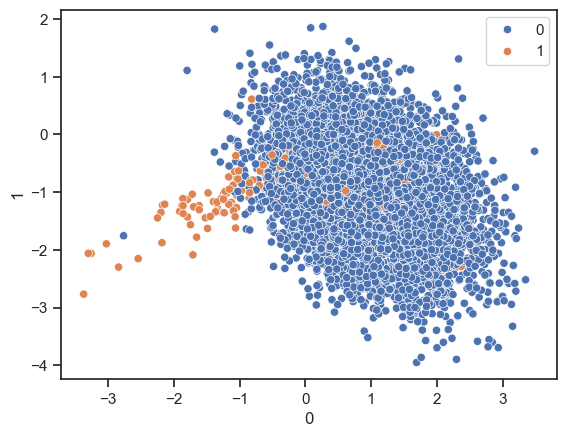

In [321]:
import seaborn as sns
sns.scatterplot(data=pd.DataFrame(X), x=0, y=1, hue=y) # pd.DataFrame(X)[0],pd.DataFrame(X)[1]<Axes: xlabel='0', ylabel='1'>

In [327]:
## Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [329]:
#Hyperparameter Tuning

In [331]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet'] ## To check which work best
c_values = [100,10,1.0,0.1,0.01] 
solver = ['newton-cg', 'lbfgs' , 'liblinear' , 'sag' , 'saga' ]
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in
[1,10,50,100]] ## Allow to play with imbalanced dataset
params = dict(penalty = penalty , C = c_values , solver =
solver,class_weight = class_weight)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid =GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [336]:
grid.best_params_


{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [339]:
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print("-----------------")
print(cm)
score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",score)
print(classification_report(y_test,y_pred))

Confusion Matrix
-----------------
[[2465    0]
 [  26    9]]
Accuracy Score : 0.9896
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



In [341]:
#Logistic Regression with ROC Curve and ROC AUC Score

In [343]:
# roc curve and auc 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


In [347]:
## Generate 2 class datasets 
X,y = make_classification(n_samples=1000,n_classes=2, random_state=1)
## Split the dataset into Train amd Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)
# Created a Dummy Model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [349]:
## Let's Create Basic Logistic Model 
model = LogisticRegression()
model.fit(X_train,y_train)
LogisticRegression()

LogisticRegression()

In [351]:
## Prediction Based On probability
model_prob = model.predict_proba(X_test)
model_prob # print probability for 0's and 1's

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [353]:
## Lets Focus on Positive Outcome
model_prob = model_prob[:,1]
## Lets Calculate the Scores
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc) #0.5 for the dummy model
print(model_auc) # 0.91 the model i.e predicted 

0.5
0.9108885464817668


In [357]:
## Calculate ROC Curves
dummy_fpr , dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr , model_tpr, thresholds = roc_curve(y_test,model_prob)
thresholds # This Threshold Value is Calculated with TPR FPR whereever there is a high TPR and less FPR 

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

In [359]:
model_fpr , model_tpr

(array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
        0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03030303,
        0.03030303, 0.03787879, 0.03787879, 0.04545455, 0.04545455,
        0.0530303 , 0.0530303 , 0.06060606, 0.06060606, 0.06818182,
        0.06818182, 0.08333333, 0.08333333, 0.09090909, 0.09090909,
        0.09848485, 0.09848485, 0.11363636, 0.11363636, 0.12121212,
        0.12121212, 0.12878788, 0.12878788, 0.15909091, 0.15909091,
        0.18181818, 0.18181818, 0.18939394, 0.18939394, 0.20454545,
        0.20454545, 0.21969697, 0.21969697, 0.22727273, 0.22727273,
        0.24242424, 0.24242424, 0.31060606, 0.31060606, 0.32575758,
        0.32575758, 0.38636364, 0.38636364, 0.40909091, 0.40909091,
        0.41666667, 0.41666667, 0.53030303, 0.53030303, 0.53787879,
        0.53787879, 1.        ]),
 array([0.        , 0.00847458, 0.1440678 , 0.1440678 , 0.23728814,
        0.23728814, 0.28813559, 0.28813559, 0.36440678, 0.36440678,
        0.3728

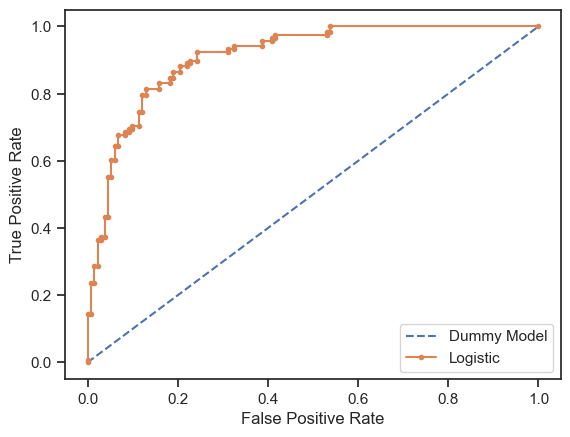

In [361]:
# Plot The ROC curve for the Model 
plt.plot(dummy_fpr, dummy_tpr, linestyle='--',label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.',label='Logistic')
#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show the legend
plt.legend()
# Show the plot
plt.show()


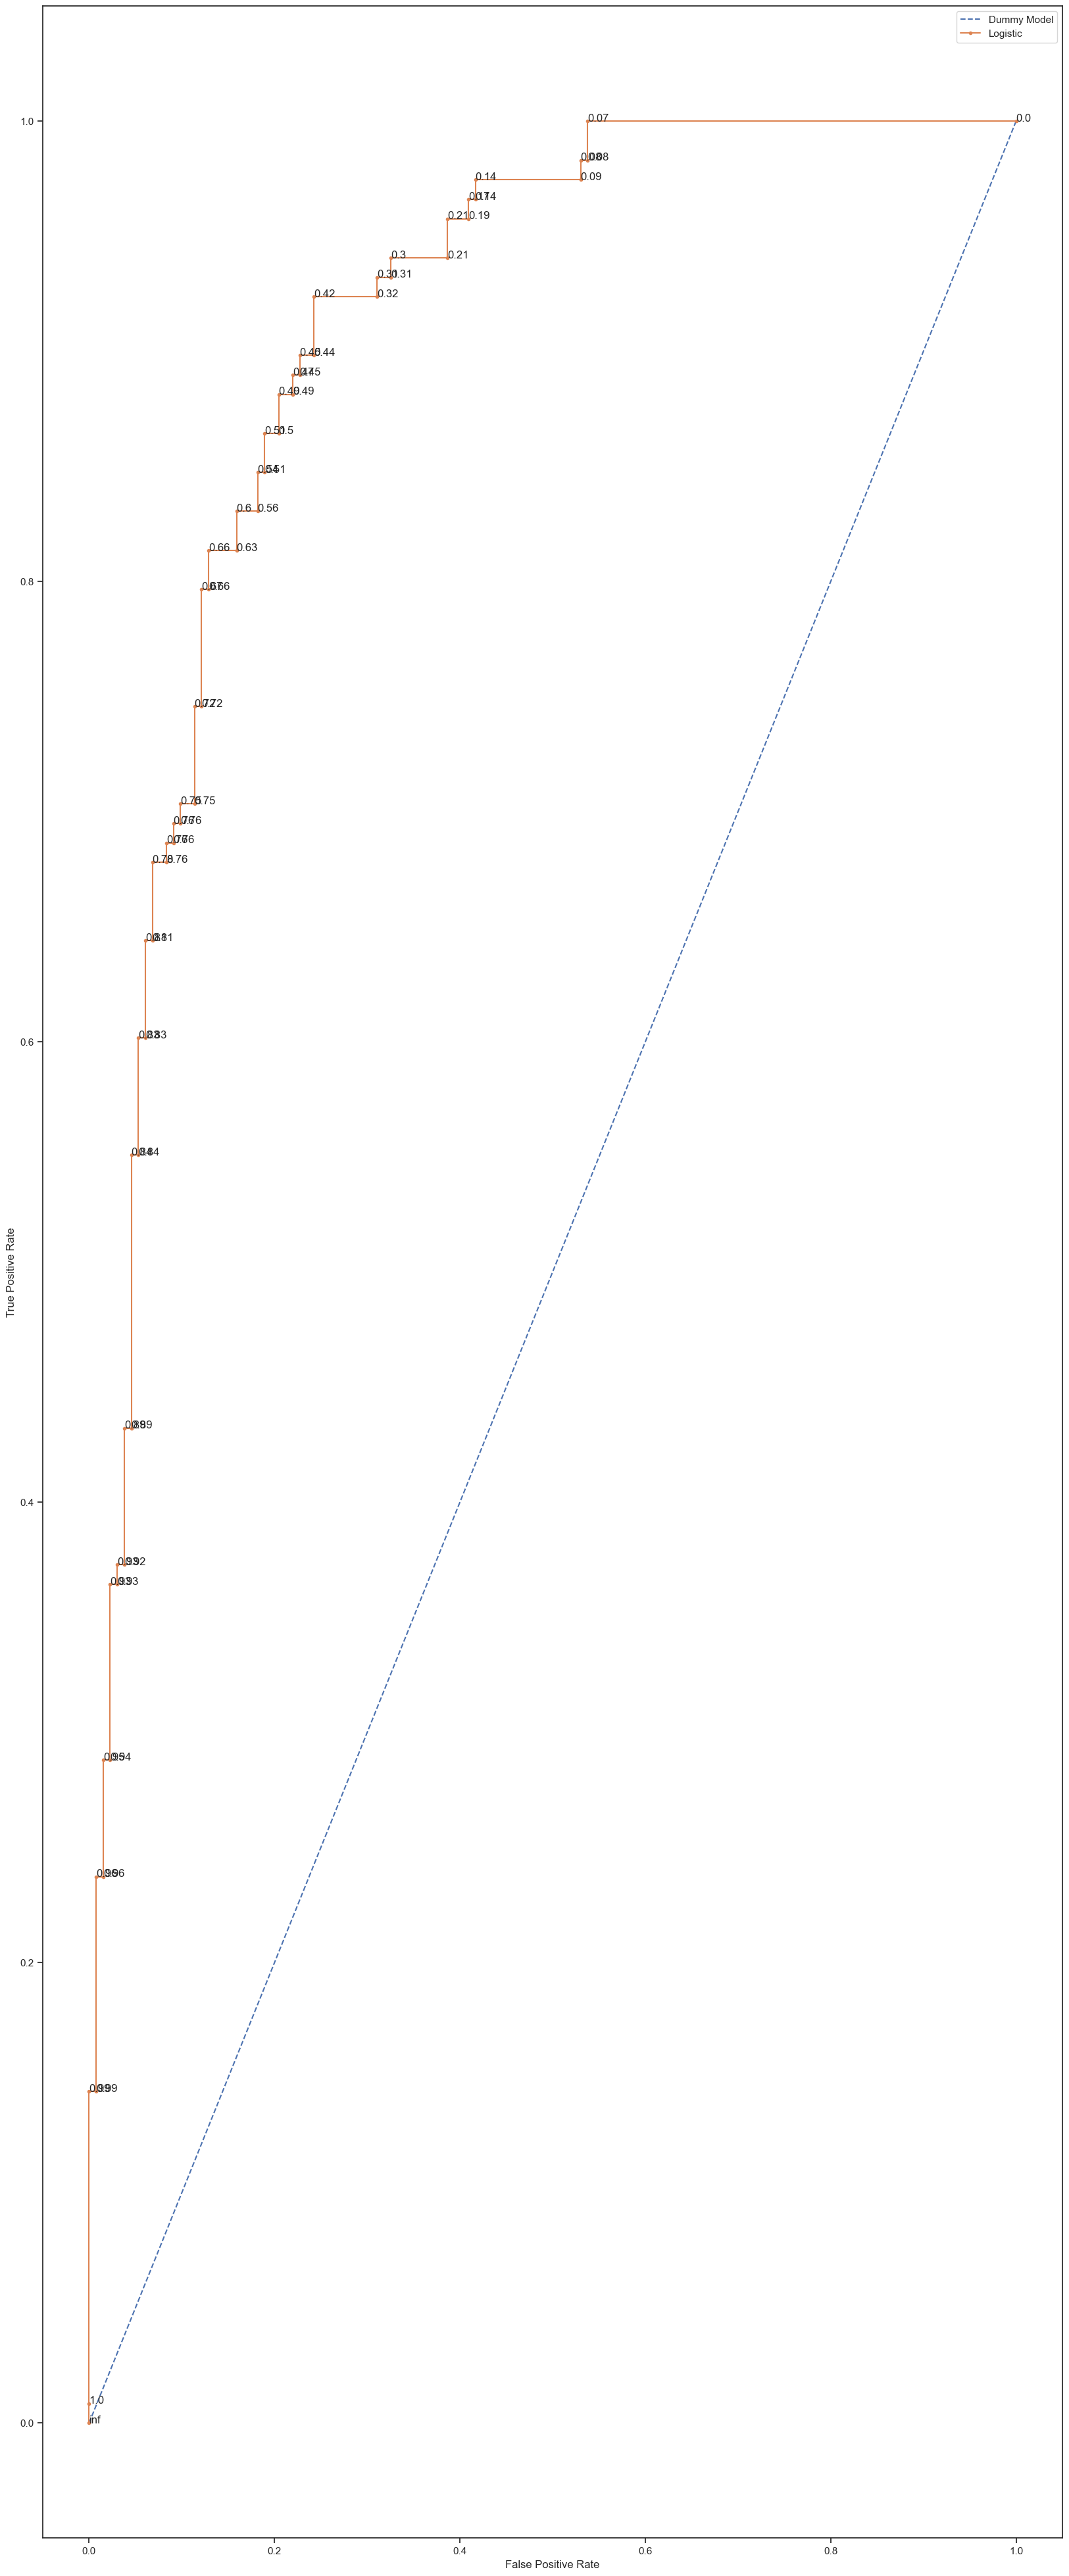

In [365]:
# Create a figure
fig = plt.figure(figsize=(20, 50))
# Add a subplot
ax = fig.add_subplot(111)
# Plot the ROC curve for the dummy model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
# Plot the ROC curve for the logistic regression model
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# Add annotations for threshold values
for xyz in zip(model_fpr, model_tpr, thresholds):
 ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))
# Set axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()
